## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

## Czynności przygotowawcze

Zanim przystąpimy do analizy zbioru danych, zaimportujmy bibliotekę pandas oraz wczytajmy plik z danymi do tabeli o standardowej nazwie df.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


## Ogólny przegląd danych

Dowiedzmy się więcej o naszych danych.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


Zobaczmy 10 przykładowych rekordów.

In [4]:
df.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
249,1.0,1.0,"Ryerson, Master. John Borie",male,13.0,2.0,2.0,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY"
1060,3.0,1.0,"Nilsson, Miss. Berta Olivia",female,18.0,0.0,0.0,347066,7.7750,NaN,S,D,NaN,NaN
455,2.0,0.0,"Howard, Mr. Benjamin",male,63.0,1.0,0.0,24065,26.0000,NaN,S,NaN,NaN,"Swindon, England"
733,3.0,1.0,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1.0,1.0,C.A. 37671,15.9000,NaN,S,2,NaN,"England Brooklyn, NY"
687,3.0,0.0,"Braf, Miss. Elin Ester Maria",female,20.0,0.0,0.0,347471,7.8542,NaN,S,NaN,NaN,"Medeltorp, Sweden Chicago, IL"
1200,3.0,0.0,"Simmons, Mr. John",male,NaN,0.0,0.0,SOTON/OQ 392082,8.0500,NaN,S,NaN,NaN,NaN
1138,3.0,0.0,"Reed, Mr. James George",male,NaN,0.0,0.0,362316,7.2500,NaN,S,NaN,NaN,NaN
1230,3.0,0.0,"Strom, Miss. Telma Matilda",female,2.0,0.0,1.0,347054,10.4625,G6,S,NaN,NaN,NaN
76,1.0,1.0,"Compton, Miss. Sara Rebecca",female,39.0,1.0,1.0,PC 17756,83.1583,E49,C,14,NaN,"Lakewood, NJ"
915,3.0,0.0,"Karlsson, Mr. Nils August",male,22.0,0.0,0.0,350060,7.5208,NaN,S,NaN,NaN,NaN


Żeby nie operować na oryginalnej tablicy danych, utwórzmy tablicę roboczą. Ponieważ operujemy językiem polskim zmienimy nazwy poszczególnych kolumn na nazwy polskie, co powinno zwiększyć przejrzystość dalszych operacji.

In [5]:
dfpl = df.rename(columns={
    'pclass' : 'klasa',
    'survived' : 'ocalony',
    'name' : 'nazwisko i imię',
    'sex' : 'płeć',
    'age' : 'wiek',
    'sibsp' : 'liczba rodzeństwa/małżonków',
    'parch' : 'liczba rodziców/dzieci',
    'ticket' : 'nr biletu',
    'fare' : 'cena biletu',
    'cabin' : 'nr kabiny',
    'embarked' : 'port',
    'boat' : 'nr łodzi',
    'body' : 'nr ciała',
    'home.dest' : 'miejsce docelowe'  
}, inplace=False).copy()

Podejrzymy początkowe i końcowe rekordy w tak utworzonej tablicy dfpl.

In [6]:
dfpl

,klasa,ocalony,nazwisko i imię,płeć,wiek,liczba rodzeństwa/małżonków,liczba rodziców/dzieci,nr biletu,cena biletu,nr kabiny,port,nr łodzi,nr ciała,miejsce docelowe
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


Przyjrzyjmy się jeszcze indeksowi tablicy.

In [7]:
dfpl.index

RangeIndex(start=0, stop=1310, step=1)

Jak widać, mamy 1310 rekordów, indeks pierwszego rekordu wynosi 0, a ostatniego 1309, i zmienia się co 1.

Nieco wcześniej, po wyświetleniu pierwszych i ostatnich rekordów tablicy danych, można było zauważyć, że ostatni rekord ma wszystkie kolumny puste. Najlepiej usunąć go już teraz.

In [9]:
dfpl.drop(1309, inplace = True)

In [10]:
dfpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   klasa                        1309 non-null   float64
 1   ocalony                      1309 non-null   float64
 2   nazwisko i imię              1309 non-null   object 
 3   płeć                         1309 non-null   object 
 4   wiek                         1046 non-null   float64
 5   liczba rodzeństwa/małżonków  1309 non-null   float64
 6   liczba rodziców/dzieci       1309 non-null   float64
 7   nr biletu                    1309 non-null   object 
 8   cena biletu                  1308 non-null   float64
 9   nr kabiny                    295 non-null    object 
 10  port                         1307 non-null   object 
 11  nr łodzi                     486 non-null    object 
 12  nr ciała                     121 non-null    float64
 13  miejsce docelowe  

W zbiorze danych mamy 1309 rekordów, a więc komplet, następujących informacji: imię i nazwisko, płeć, liczbę rodzeństwa względnie małżonków, liczbę rodziców względnie dzieci, nr biletu oraz informację, czy dana osoba przeżyła. W jednym rekordzie brakuje informacji o cenie biletu, a w dwóch o porcie pierwotnym. Znacznie więcej informacji brakuje odnośnie wieku, numeru kabiny, numeru łodzi, numeru ciała i miejsca docelowego podróży ew. adresu zamieszkania.

In [11]:
dfpl.nunique()

klasa                             3
ocalony                           2
nazwisko i imię                1307
płeć                              2
wiek                             98
liczba rodzeństwa/małżonków       7
liczba rodziców/dzieci            8
nr biletu                       929
cena biletu                     281
nr kabiny                       186
port                              3
nr łodzi                         27
nr ciała                        121
miejsce docelowe                369
dtype: int64

Widzimy, że w zbiorze danych są uwzględnione 3 klasy (a więc wszystkie), 3 porty pierwotne (również wszystkie). Także informacja o przeżyciu oraz o płci wydają kompletne i wiarygodne.

Imię i nazwisko oraz forma grzecznościowa są niestety umieszczone razem w jednej kolumnie. Wydaje się, że warto spróbować wyodrębnić te dane, przynajmniej częściowo, do oddzielnych kolumn, dzięki czemu będziemy mogli później uzyskać informacje w kontekście rodzin.Wyodrębnienie tych danych do oodzielnych kolumn zrobimy już teraz, aby móc je wykorzystać przy analizie pojedynczych zmiennych.
Od razu też zmieńmy kolejność kolumn, aby zbiór danych był bardziej przejrzysty.

In [12]:
dfpl[['nazwisko', 'tytuł', 'imię']] = dfpl['nazwisko i imię'].str.extract(r'([^,]+),\s*([^\.]+\.)\s*(.*)')

In [13]:
dfpl = dfpl[['klasa', 'ocalony', 'tytuł', 'nazwisko', 'imię', 'płeć', 'wiek', 'liczba rodzeństwa/małżonków', 'liczba rodziców/dzieci', 'nr biletu', 'cena biletu', 'nr kabiny', 'port', 'nr łodzi', 'nr ciała', 'miejsce docelowe', 'nazwisko i imię']] 

Sprawdźmy, czy udało się to poprawnie zrobić i jakie mamy kolumny po tej operacji.

In [14]:
dfpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   klasa                        1309 non-null   float64
 1   ocalony                      1309 non-null   float64
 2   tytuł                        1309 non-null   object 
 3   nazwisko                     1309 non-null   object 
 4   imię                         1309 non-null   object 
 5   płeć                         1309 non-null   object 
 6   wiek                         1046 non-null   float64
 7   liczba rodzeństwa/małżonków  1309 non-null   float64
 8   liczba rodziców/dzieci       1309 non-null   float64
 9   nr biletu                    1309 non-null   object 
 10  cena biletu                  1308 non-null   float64
 11  nr kabiny                    295 non-null    object 
 12  port                         1307 non-null   object 
 13  nr łodzi          

Popatrzmy z lotu ptaka na liczbę wartości przyjmowanych przez dane w poszczególnych kolumnach. 

In [15]:
dfpl.nunique()

klasa                             3
ocalony                           2
tytuł                            18
nazwisko                        875
imię                           1125
płeć                              2
wiek                             98
liczba rodzeństwa/małżonków       7
liczba rodziców/dzieci            8
nr biletu                       929
cena biletu                     281
nr kabiny                       186
port                              3
nr łodzi                         27
nr ciała                        121
miejsce docelowe                369
nazwisko i imię                1307
dtype: int64

Trzy wartości dla klasy, dwie wartości o przeżyciu, dwie o płci, 98 o wieku wydają - te kolumny wydają się wiarygodne. W bazie mamy wskazanych 186 kabin, 3 porty pierwotne, 27 łodzi ratunkowych, numery ciał 121 osób.

Dziwne wydaje się, że tytuł stawiany przez imieniem i nazwiskiem pasażerów przyjmuje aż 18 wartości. Sprawdźmy to.

In [16]:
dfpl['tytuł'].drop_duplicates()

0              Miss.
1            Master.
3                Mr.
4               Mrs.
10              Col.
12              Mme.
40               Dr.
45            Major.
81             Capt.
99             Lady.
100             Sir.
199            Mlle.
218            Dona.
234        Jonkheer.
245    the Countess.
299             Don.
335             Rev.
546              Ms.
Name: tytuł, dtype: object

Tytuły wyglądają dość prawdopodobnie, choć niektóre wydają się dość dziwne.

## Analiza brakujących wartości

Przyjrzyjmy się dokładniej liczbie brakujących danych.

In [17]:
dfpl.isnull().sum()

klasa                             0
ocalony                           0
tytuł                             0
nazwisko                          0
imię                              0
płeć                              0
wiek                            263
liczba rodzeństwa/małżonków       0
liczba rodziców/dzieci            0
nr biletu                         0
cena biletu                       1
nr kabiny                      1014
port                              2
nr łodzi                        823
nr ciała                       1188
miejsce docelowe                564
nazwisko i imię                   0
dtype: int64

In [22]:
dfpl[dfpl["ocalony"] == 0].isnull().sum()

klasa                            0
ocalony                          0
tytuł                            0
nazwisko                         0
imię                             0
płeć                             0
wiek                           190
liczba rodzeństwa/małżonków      0
liczba rodziców/dzieci           0
nr biletu                        0
cena biletu                      1
nr kabiny                      707
port                             0
nr łodzi                       800
nr ciała                       688
miejsce docelowe               411
nazwisko i imię                  0
dtype: int64

In [19]:
dfpl["ocalony"].sum()

500.0

In [20]:
dfpl[dfpl["ocalony"] == 1].isnull().sum()

klasa                            0
ocalony                          0
tytuł                            0
nazwisko                         0
imię                             0
płeć                             0
wiek                            73
liczba rodzeństwa/małżonków      0
liczba rodziców/dzieci           0
nr biletu                        0
cena biletu                      0
nr kabiny                      307
port                             2
nr łodzi                        23
nr ciała                       500
miejsce docelowe               153
nazwisko i imię                  0
dtype: int64

Jak widać z powyższych zestawień, brakuje danych o wieku aż 263 osób. W znacznym stopniu ogranicza to ich jakość. Jeszcze bardziej niepełne są dane dotyczące numeru kabiny (brak 1014 pozycji). Licza ocalonych to 500 osób, czyli liczba osób w bazie danych, które zginęły, wynosi 1309 - 500 = 809. Brakuje więc danych o numerze ciała dla 119 osób - w większości przypadków prawdopodobnie z tego powodu, że ich ciała nie zostały odnalezione. Tylko 9 osób, które zginęły, ma ustalony numer łodzi. Tak więc, albo dane o numerze łodzi nie mogły być odtworzone w przypadku ofiar, albo fakt dostania się na łódź ratunkową w wysokim stopniu gwarantował ocalenie. U osób ocalonych informacji o numerze łodzi brakuje tylko w 23 przypadkach (823 - 800, czyli tylko w poniżej 5% przypadków osób ocalonych).



## Analiza pojedynczych zmiennych

Spójrzmy najpierw na strukturę wiekową pasażerów (z pominięciem oczywiście tych, których wieku w bazie danych brakuje).

In [86]:
dfpl["wiek"].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: wiek, dtype: float64

Jak widać średnia wieku pasażerów wynosiła niecałe 30 lat, mediana wieku była niewiele niższa - 28 lat. 50% pasażerów była w wieku pomiędzy 21 a 39 lat. Byli to więc ludzie młodzi, jak na dzisiejsze czasy. Najmłodszy pasażer miał zaledwie 2 miesiące, a najstarszy 80 lat.

Narysujmy teraz histogram obrazujący jeszcze dokładniej strukturę wiekową pasażerów oraz zestawiający ją ze strukturą wiekową ocalonych.

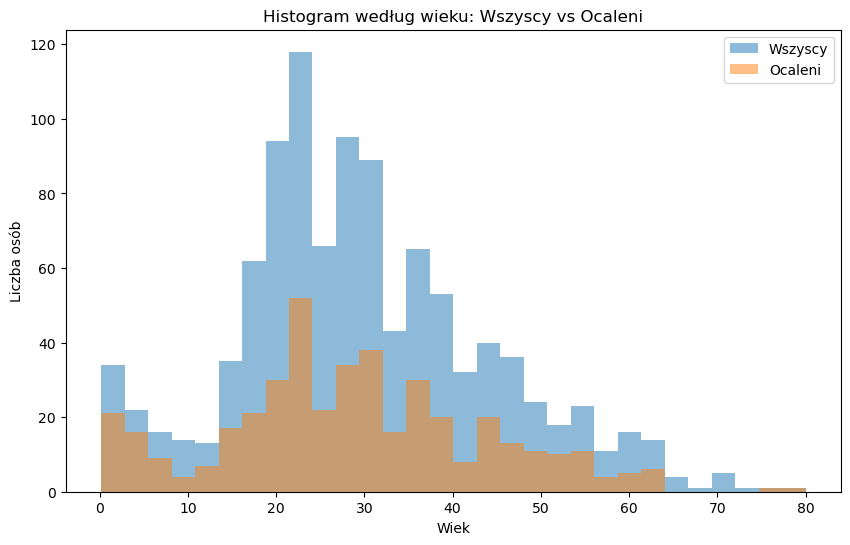

In [23]:
# Import the required dependencies
import matplotlib.pyplot as plt

# Drop rows with NaN values in 'age' or 'survived' columns
df_clean = dfpl.dropna(subset=['wiek', 'ocalony'])

# Separate data for all individuals and those who survived
all_ages = df_clean['wiek']
survived_ages = df_clean[df_clean['ocalony'] == 1]['wiek']

# Plotting the histograms
plt.figure(figsize=(10, 6))
plt.hist(all_ages, bins=30, alpha=0.5, label='Wszyscy')
plt.hist(survived_ages, bins=30, alpha=0.5, label='Ocaleni')

# Adding labels and title
plt.xlabel('Wiek')
plt.ylabel('Liczba osób')
plt.title('Histogram według wieku: Wszyscy vs Ocaleni')
plt.legend()

Jak widać, wiek pasażerów nie miał w zasadzie większego wpływu na szanse ocalenia, gdyż struktura wieku ocalonych jest zbliżona do struktury wieku wszystkich pasażerów. Wyraźnie mniejsze szanse ocalenia miały tylko dzieci około 9 roku życia, osoby krótko po czterdziestce oraz osoby w wieku 70 plus/minus 5 lat. Do tych ostatnich obserwacji trzeba jednak podchodzić ostrożnie z uwagi na fakt, że w bazie brakuje wieku około 20% pasażerów.

Zobaczmy, jak wyglądała struktura wieku ocalonych.

In [137]:
survived_ages.describe()

count    427.000000
mean      28.918228
std       15.061481
min        0.166700
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: wiek, dtype: float64

Mediana wieku ocalonych jest równa medianie wieku wszystkich pasażerów, średnia wieku ocalonych jest o rok niższa niż średnia wieku wszystkich ocalonych. To potwierdza wcześniejsze obserwacje, że w skali całego statku wiek nie miał większego wpływu na szansę uratowania się. Najmłodzy uratowany pasażer miał 2 miesiące, a najstarszy 80 lat.

Skonstruujmy jeszcze dokładniejszy wykres pokazujący szansę na ocalenie według wieku.

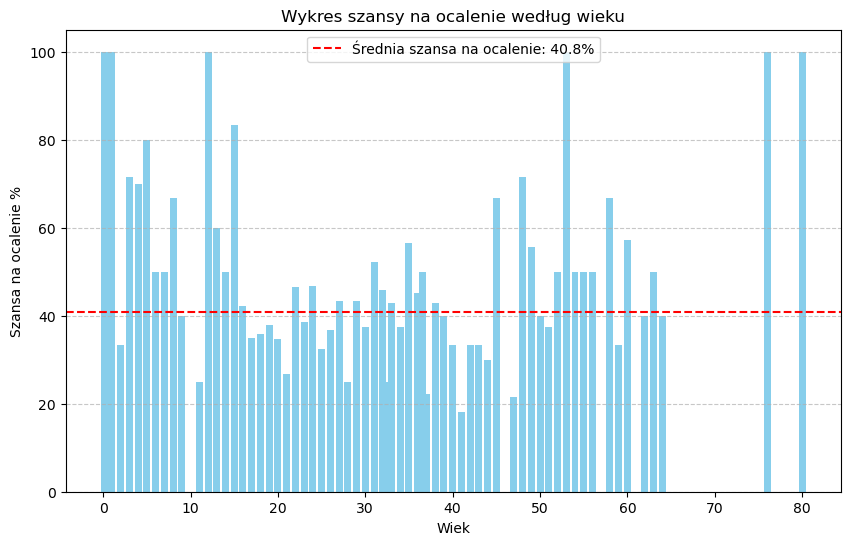

In [254]:
# Calculate the probability of survival for each age
age_survival_prob = 100 * df_clean.groupby('wiek')['ocalony'].mean()

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(age_survival_prob.index, age_survival_prob.values, color='skyblue')

plt.xlabel('Wiek')
plt.ylabel('Szansa na ocalenie %')
plt.title('Wykres szansy na ocalenie według wieku')
plt.grid(axis='y', linestyle='--', alpha=0.7)

average_survival_chance = df_clean['ocalony'].mean() * 100
plt.axhline(y=average_survival_chance, color='red', linestyle='--', label=f'Średnia szansa na ocalenie: {average_survival_chance:.1f}%')
plt.legend()


Wykres potwierdza nasze wcześniejsze obserwacje. Widzimy przy tym, że średnia szansa na ocalenie wyniosła nieco ponad 40%. 
Widzimy też, że przeżył komplet pasażerów najmłodszych (poniżej 2 lat) i najstarszych (w wieku 80 lat). Widać więc, że najmłodszych i najstarszych potraktowano jako pasażerów specjalnej troski i uczyniono wiele, by ich uratować.

Przeanalizujmy teraz dane pod kątem płci pasażerów.

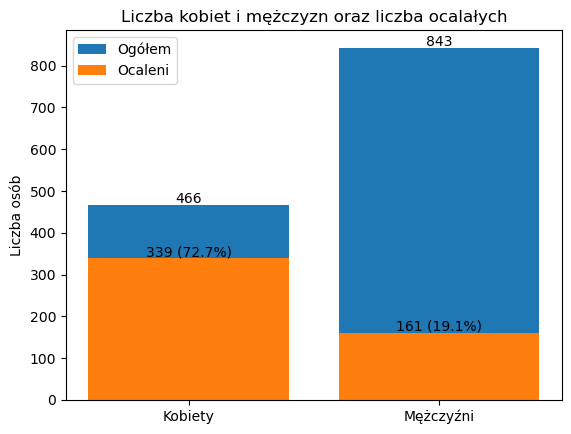

In [255]:
# Import the required dependencies

import matplotlib.pyplot as plt

# Calculate the number of women, women survived, men, and men survived
num_women = dfpl[dfpl['płeć'] == 'female'].shape[0]
num_women_survived = dfpl[(dfpl['płeć'] == 'female') & (dfpl['ocalony'] == 1)].shape[0]
num_men = dfpl[dfpl['płeć'] == 'male'].shape[0]
num_men_survived = dfpl[(dfpl['płeć'] == 'male') & (dfpl['ocalony'] == 1)].shape[0]

# Create a bar chart
fig, ax = plt.subplots()

# Plot data
ax.bar(['Kobiety', 'Mężczyźni'], [num_women, num_men], label='Ogółem')
ax.bar(['Kobiety', 'Mężczyźni'], [num_women_survived, num_men_survived], label='Ocaleni')
percent_women = round(num_women_survived*100/num_women, 1)
percent_men  = round(num_men_survived*100/num_men, 1)

# Add text annotations
ax.text(0, num_women + 5, str(num_women), ha='center')
ax.text(0, num_women_survived + 5, str(num_women_survived) + " (" + str(percent_women) + "%)", ha='center')
ax.text(1, num_men + 5, str(num_men), ha='center')
ax.text(1, num_men_survived + 5, str(num_men_survived) + " (" + str(percent_men) + "%)", ha='center')

# Set labels and title
ax.set_ylabel('Liczba osób')
ax.set_title('Liczba kobiet i mężczyzn oraz liczba ocalałych')
ax.legend()


W bazie danych mamy 843 mężczyzn i 466 kobiet. Spośród nich uratowało się prawie 75% kobiet i tylko 19% mężczyzn. To znów wskazuje, że zadbano szczególnie nie tylko o tych najmłodszych i najstarszych, ale także o kobiety. Prawdopodobnie im przede wszystkim ustąpiono pierwszeństwa na łodziach ratunkowych.

Zobaczmy teraz, czy port, w którym się zaokrętowano, miał wpływ na szanse przeżycia. Intuicyjnie rzecz ujmując, nie powinien mieć większego wpływu.

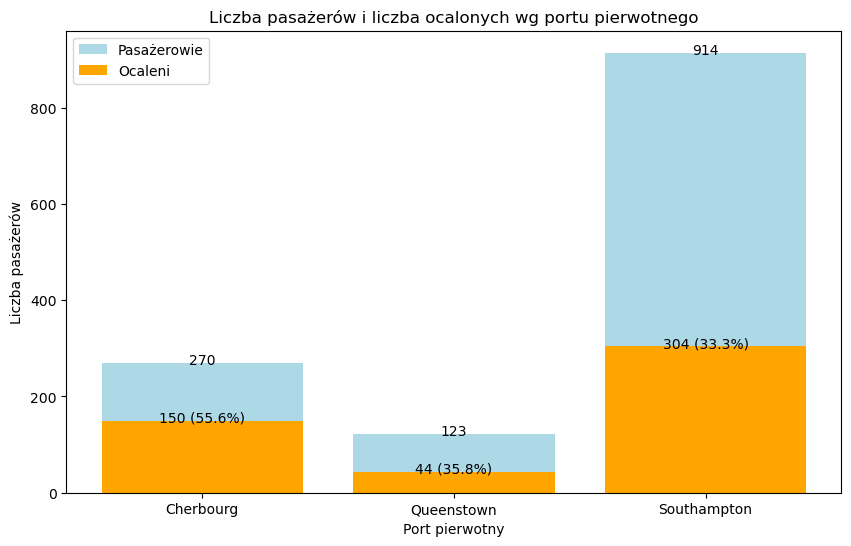

In [26]:
# Map port codes to full names
port_names = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

# Drop rows with missing 'port' or 'ocalony' values
df_ports = dfpl.dropna(subset=['port', 'ocalony'])

# Group by 'embarked' and calculate the number of passengers and survivors
passenger_counts = df_ports.groupby('port').size()
survivor_counts = df_ports.groupby('port')['ocalony'].sum()

# Calculate the percentage of survivors
survivor_percentages = (survivor_counts / passenger_counts) * 100

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the total number of passengers
bars1 = ax.bar(port_names.values(), passenger_counts, label='Pasażerowie', color='lightblue')

# Plot the number of survivors on the same bars
bars2 = ax.bar(port_names.values(), survivor_counts, label='Ocaleni', color='orange')

# Annotate the bars with the counts and percentages
for bar1, bar2, count, survived, percent in zip(bars1, bars2, passenger_counts, survivor_counts, survivor_percentages):
    ax.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height() - 10, f'{int(count)}', ha='center', va='bottom', color='black')
    ax.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height() - 10, f'{int(survived)} ({percent:.1f}%)', ha='center', va='bottom', color='black')

# Set labels and title
ax.set_xlabel('Port pierwotny')
ax.set_ylabel('Liczba pasażerów')
ax.set_title('Liczba pasażerów i liczba ocalonych wg portu pierwotnego')
ax.legend()

A jednak okazuje się, że widać pewien wpływ portu pierwotnego na szansę przeżycia. Uratowała się ponad połowa pasażerów z Cherbourga, a tylko około 1/3 pasażerów z pozostałych portów. Przy okazji widzimy też, że zdecydowana większość pasażerów płynęłą z Southampton, a zdecydowanie najmniej Queenstown. Czy to tylko przypadek?

Spójrzmy na to, jak uzależniona była szansa na przeżycie od klasy biletu, z którym się podróżowało.

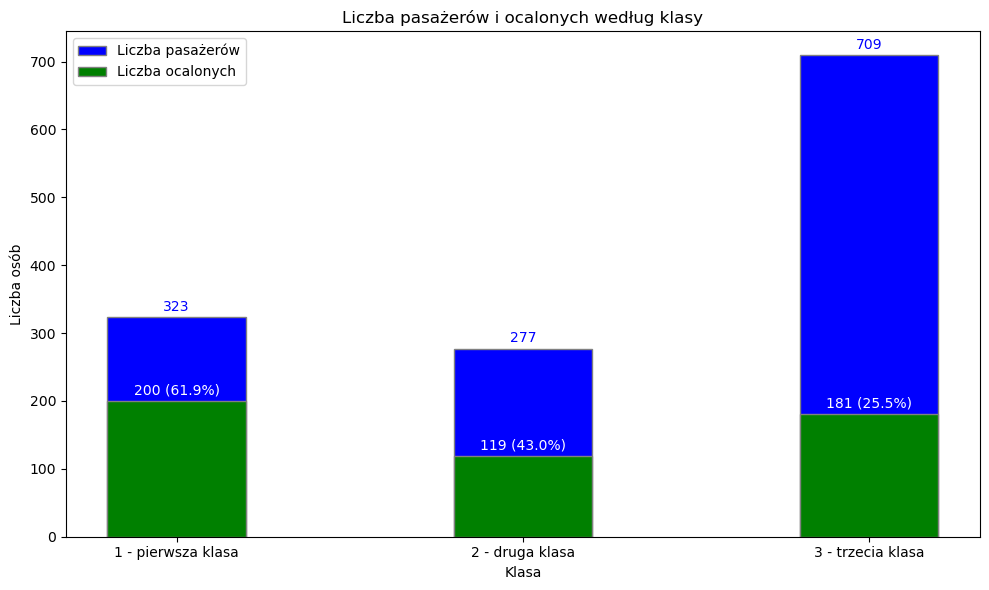

In [256]:
# Import the required dependencies
import numpy as np

# Drop rows with NaN values in 'klasa' or 'ocalony'
df_class = dfpl.dropna(subset=['klasa', 'ocalony'])

# Map class numbers to class names
class_names = {1: '1 - pierwsza klasa', 2: '2 - druga klasa', 3: '3 - trzecia klasa'}
df_class['klasa'] = df_class['klasa'].map(class_names)

# Group by class and calculate total passengers and survivors
class_group = df_class.groupby('klasa').agg(
    total_passengers=('ocalony', 'count'),
    total_survived=('ocalony', 'sum')
).reset_index()

# Calculate survival percentage
class_group['survival_percentage'] = (class_group['total_survived'] / class_group['total_passengers']) * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.4

# Positions of bars on x-axis
r1 = np.arange(len(class_group))
r2 = [x + bar_width for x in r1]

# Create bars
ax.bar(r1, class_group['total_passengers'], color='b', width=bar_width, edgecolor='grey', label='Liczba pasażerów')
ax.bar(r1, class_group['total_survived'], color='g', width=bar_width, edgecolor='grey', label='Liczba ocalonych')

# Add data labels
for i, row in class_group.iterrows():
    ax.text(i, row['total_passengers'] + 5, f"{row['total_passengers']}", ha='center', va='bottom', color='blue')
    ax.text(i, row['total_survived'] + 5, f"{row['total_survived']:.0f} ({row['survival_percentage']:.1f}%)", ha='center', va='bottom', color='white')

# Add labels and title
ax.set_xlabel('Klasa')
ax.set_ylabel('Liczba osób')
ax.set_title('Liczba pasażerów i ocalonych według klasy')
ax.set_xticks(r1)
ax.set_xticklabels(class_group['klasa'])
ax.legend()

# Save the plot as a PNG file
plt.tight_layout()

Największe szanse na przeżycie miały więc niemowlęta, kobiety, a także najbogatsi pasażerowie - ci, którzy podróżowali w pierwszej klasie. Być może to rzuca też pewne światło na to, że pasażerowie z Cherbourga mieli większe szanse niż z Southampton (czyżby Cherbourg był bogatszym miastem niż Southampton?). O ile uratowało się prawie 62% pasażerów z pierwszej klasy, to tylko 25% z trzeciej klasy. 

Uzyskajmy teraz więcej informacji o rodzinach, które wspólnie podróżowały na statuku.

Na początek zobaczmy, jakie były największe rodziny.

In [267]:
dfpl[dfpl["liczba rodzeństwa/małżonków"] >= 5]

,klasa,ocalony,tytuł,nazwisko,imię,płeć,wiek,liczba rodzeństwa/małżonków,liczba rodziców/dzieci,nr biletu,cena biletu,nr kabiny,port,nr łodzi,nr ciała,miejsce docelowe,nazwisko i imię,cleaned_name_ticket,cleaned_name_cabin,cleaned_name_home_dest
825,3.0,0.0,Master.,Goodwin,Harold Victor,male,9.0,5.0,2.0,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY","Goodwin, Master. Harold Victor",GoodwinCA 2144,NaN,"GoodwinWiltshire, England Niagara Falls, NY"
826,3.0,0.0,Master.,Goodwin,Sidney Leonard,male,1.0,5.0,2.0,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY","Goodwin, Master. Sidney Leonard",GoodwinCA 2144,NaN,"GoodwinWiltshire, England Niagara Falls, NY"
827,3.0,0.0,Master.,Goodwin,William Frederick,male,11.0,5.0,2.0,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY","Goodwin, Master. William Frederick",GoodwinCA 2144,NaN,"GoodwinWiltshire, England Niagara Falls, NY"
828,3.0,0.0,Miss.,Goodwin,Jessie Allis,female,10.0,5.0,2.0,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY","Goodwin, Miss. Jessie Allis",GoodwinCA 2144,NaN,"GoodwinWiltshire, England Niagara Falls, NY"
829,3.0,0.0,Miss.,Goodwin,Lillian Amy,female,16.0,5.0,2.0,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY","Goodwin, Miss. Lillian Amy",GoodwinCA 2144,NaN,"GoodwinWiltshire, England Niagara Falls, NY"
830,3.0,0.0,Mr.,Goodwin,Charles Edward,male,14.0,5.0,2.0,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY","Goodwin, Mr. Charles Edward",GoodwinCA 2144,NaN,"GoodwinWiltshire, England Niagara Falls, NY"
1170,3.0,0.0,Master.,Sage,Thomas Henry,male,NaN,8.0,2.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,"Sage, Master. Thomas Henry",SageCA. 2343,NaN,NaN
1171,3.0,0.0,Master.,Sage,William Henry,male,14.5,8.0,2.0,CA. 2343,69.55,NaN,S,NaN,67.0,NaN,"Sage, Master. William Henry",SageCA. 2343,NaN,NaN
1172,3.0,0.0,Miss.,Sage,Ada,female,NaN,8.0,2.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,"Sage, Miss. Ada",SageCA. 2343,NaN,NaN
1173,3.0,0.0,Miss.,Sage,Constance Gladys,female,NaN,8.0,2.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,"Sage, Miss. Constance Gladys",SageCA. 2343,NaN,NaN


In [272]:
dfpl[(dfpl["nazwisko"] == "Sage") | (dfpl["nazwisko"] == "Goodwin")]

,klasa,ocalony,tytuł,nazwisko,imię,płeć,wiek,liczba rodzeństwa/małżonków,liczba rodziców/dzieci,nr biletu,cena biletu,nr kabiny,port,nr łodzi,nr ciała,miejsce docelowe,nazwisko i imię,cleaned_name_ticket,cleaned_name_cabin,cleaned_name_home_dest
825,3.0,0.0,Master.,Goodwin,Harold Victor,male,9.0,5.0,2.0,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY","Goodwin, Master. Harold Victor",GoodwinCA 2144,NaN,"GoodwinWiltshire, England Niagara Falls, NY"
826,3.0,0.0,Master.,Goodwin,Sidney Leonard,male,1.0,5.0,2.0,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY","Goodwin, Master. Sidney Leonard",GoodwinCA 2144,NaN,"GoodwinWiltshire, England Niagara Falls, NY"
827,3.0,0.0,Master.,Goodwin,William Frederick,male,11.0,5.0,2.0,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY","Goodwin, Master. William Frederick",GoodwinCA 2144,NaN,"GoodwinWiltshire, England Niagara Falls, NY"
828,3.0,0.0,Miss.,Goodwin,Jessie Allis,female,10.0,5.0,2.0,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY","Goodwin, Miss. Jessie Allis",GoodwinCA 2144,NaN,"GoodwinWiltshire, England Niagara Falls, NY"
829,3.0,0.0,Miss.,Goodwin,Lillian Amy,female,16.0,5.0,2.0,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY","Goodwin, Miss. Lillian Amy",GoodwinCA 2144,NaN,"GoodwinWiltshire, England Niagara Falls, NY"
830,3.0,0.0,Mr.,Goodwin,Charles Edward,male,14.0,5.0,2.0,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY","Goodwin, Mr. Charles Edward",GoodwinCA 2144,NaN,"GoodwinWiltshire, England Niagara Falls, NY"
831,3.0,0.0,Mr.,Goodwin,Charles Frederick,male,40.0,1.0,6.0,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY","Goodwin, Mr. Charles Frederick",GoodwinCA 2144,NaN,"GoodwinWiltshire, England Niagara Falls, NY"
832,3.0,0.0,Mrs.,Goodwin,Frederick (Augusta Tyler),female,43.0,1.0,6.0,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY","Goodwin, Mrs. Frederick (Augusta Tyler)",GoodwinCA 2144,NaN,"GoodwinWiltshire, England Niagara Falls, NY"
1170,3.0,0.0,Master.,Sage,Thomas Henry,male,NaN,8.0,2.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,"Sage, Master. Thomas Henry",SageCA. 2343,NaN,NaN
1171,3.0,0.0,Master.,Sage,William Henry,male,14.5,8.0,2.0,CA. 2343,69.55,NaN,S,NaN,67.0,NaN,"Sage, Master. William Henry",SageCA. 2343,NaN,NaN


Dwie największe rodziny podróżowały z Southampton, trzecią klasą.

Rodzina Sage - dziewięcioro rodzeństwa i dwoje rodziców Nie znamy numeru ich kabiny, nie wiemy dokąd podróżowali, nie znamy ich wieku, poza jednym wyjątkiem (Wiliam Henry,14.5 lat). Było to pięciu braci i cztery siostry. Wszyscy - dzieci i rodzice - zginęli.

Rodzina Goodwin - sześcioro rodzeństwa w wieku od 1 roku do 16 lat (dwie siostry i czterech braci) i dwoje rodziców - żona w wieku 43 lat i mąż - 40 lat. Pochodzili z Wiltshire w Anglii, podróżowali do Niagara Falls, NY. Także nie znamy numeru ich kabiny. Również wszyscy zginęli.

W dalszej części analizy przeanalizujmy dane pod kątem rodzin, ograniczając się do rodzin, które podróżowały na wspólnym bilecie. Wyszczególnijmy wszystkie osoby z bazy, które wchodzą w skład tak rozumianej rodziny do tabeli danych o nazwie family_members.

In [298]:
def clean_text(text):
    if pd.isna(text):
        return ''
    return ''.join([char for char in text if char.isalpha()])

dfpl['cleaned_name_ticket'] = dfpl['nazwisko'].apply(clean_text) + dfpl['nr biletu']

counts_name_ticket = dfpl['cleaned_name_ticket'].value_counts()

condition = (
    (dfpl['cleaned_name_ticket'].map(counts_name_ticket) >= 2) 
)

family_members = dfpl[condition].copy()

C:\Users\piotr\AppData\Local\Temp\ipykernel_8872\2101784816.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpl['cleaned_name_ticket'] = dfpl['nazwisko'].apply(clean_text) + dfpl['nr biletu']


Pojawiło się ostrzeżenie systemu, ale wydaje się, że możemy je zignorować, gdyż samo polecenie zadziałało prawidłowo.

Zagregujmy dane o liczbie członków poszczególnych rodzin i liczbie ocalonych w tabeli o nazwie families.

In [273]:
families = family_members.groupby('cleaned_name_ticket', as_index=False).agg({'ocalony': ['sum'], 'nazwisko' : ['count']})

In [120]:
family_members.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 1 to 1305
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   klasa                        461 non-null    float64
 1   ocalony                      461 non-null    float64
 2   tytuł                        461 non-null    object 
 3   nazwisko                     461 non-null    object 
 4   imię                         461 non-null    object 
 5   płeć                         461 non-null    object 
 6   wiek                         401 non-null    float64
 7   liczba rodzeństwa/małżonków  461 non-null    float64
 8   liczba rodziców/dzieci       461 non-null    float64
 9   nr biletu                    461 non-null    object 
 10  cena biletu                  461 non-null    float64
 11  nr kabiny                    141 non-null    object 
 12  port                         461 non-null    object 
 13  nr łodzi           

In [279]:
families.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (cleaned_name_ticket, )  176 non-null    object 
 1   (ocalony, sum)           176 non-null    float64
 2   (nazwisko, count)        176 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.3+ KB


Widzimy powyżej, że mamy wyszczególnione 176 rodzin, a w nich dane o 461 osobach.

Do tabeli families wprowadźmy kolumny z informacją o tym, ilu członków każdej z rodzin podróżowało na pokładzie, ilu ocalało, ilu żyje a ilu nie żyje.

In [280]:
families["żyje"] = families["ocalony"].copy()

In [281]:
families["stanpocz"] = families["nazwisko"].copy()

In [282]:
families["nieżyje"]=families["stanpocz"]-families["żyje"]

Wyświetlmy dane pięciu przykładowych rodzin. 

In [283]:
families.sample(5)

,cleaned_name_ticket,ocalony,nazwisko,żyje,stanpocz,nieżyje
,,sum,count,,,
158,VanImpe345773,0.0,3,0.0,3,3.0
30,ChapmanSC/AH 29037,0.0,2,0.0,2,2.0
153,Thayer17421,2.0,3,2.0,3,1.0
27,Cavendish19877,1.0,2,1.0,2,1.0
169,Widener113503,1.0,3,1.0,3,2.0


Teraz do każdej rodziny dodajmy jeszcze informację, czy katastrofę przeżyli wszyscy jej członkowie, czy nikt, czy tylko część.

In [284]:
families["wszyscy"] = 1 * (families["nieżyje"] == 0)

In [285]:
families["nikt"] = 1 * (families["nieżyje"] == families["stanpocz"])

In [286]:
families["część"] = (1 - families["wszyscy"]) * (1 - families["nikt"])

Znów wyświetlmy pięć przykładowych rekordów.

In [289]:
families.sample(5)

,cleaned_name_ticket,ocalony,nazwisko,żyje,stanpocz,nieżyje,wszyscy,nikt,część
,,sum,count,,,,,,
85,JefferysC.A. 31029,0.0,2,0.0,2,2.0,0,1,0
81,Holverson113789,1.0,2,1.0,2,1.0,0,0,1
12,BaxterPC 17558,1.0,2,1.0,2,1.0,0,0,1
87,JohnsonLINE,0.0,2,0.0,2,2.0,0,1,0
164,Weisz228414,1.0,2,1.0,2,1.0,0,0,1


Zobrazujmy teraz na wykresie kołowym, ile rodzin ocalało w całości, ile częściowo, a w ilu przypadkach zniknęły całe rodziny.

Text(0.5, 1.0, 'Łącznie rodzin: 176')

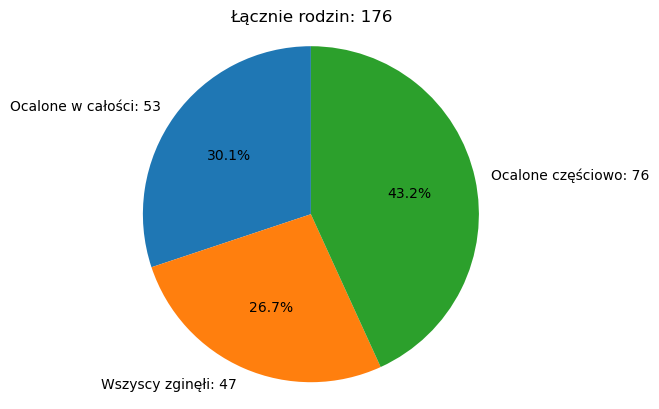

In [297]:
import matplotlib.pyplot as plt

# Calculate the sum of values in the specified columns
survived_sum = families['wszyscy'].sum(skipna=True)
sibsp_sum = families['nikt'].sum(skipna=True)
parch_sum = families['część'].sum(skipna=True)

# Calculate the total sum
total_sum = survived_sum + sibsp_sum + parch_sum

# Prepare data for the pie chart
labels = [
    f'Ocalone w całości: {survived_sum}',
    f'Wszyscy zginęłi: {sibsp_sum}',
    f'Ocalone częściowo: {parch_sum}'
]
sizes = [survived_sum, sibsp_sum, parch_sum]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title with the total sum
plt.title(f'Łącznie rodzin: {total_sum}')


Widzimy więc, że spośród 176 rodzin aż 47 rodzin zupełnie zniknęło, a w całości ocalały 53 rodziny.

## Transformacja danych

Baza danych jest w dużej części pełna, jeśli chodzi o podstawowe dane - imię i nazwisko, płeć, ilość rodzeństwa, małżonków, ilość dzieci, rodziców, numer biletu, cena biletu oraz o informację, czy dana osoba przeżyła. Niepełne są istotne dane odnośnie wieku, portu docelowego/miejsca zamieszkania, numeru kabiny. Można byłoby tu jeszcze przeanmlizować, czy możliwe jest jakieś uzupełnienie wieku oraz adresu docelowego na podstawie informacji o pozostałych członkach rodziny. 

Częściowo dokonaliśmy transformacji danych już na wcześniejszych etapach analizy. Wydaje mi się, że dodatkowa transformacja danych dopiero na tym etapie w przypadku wielu baz jest spóźniona i wymagałaby dokonania dużej częśći analizy od nowa.

## Analiza relacji między zmiennymi

In [300]:
dfpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   klasa                        1309 non-null   float64
 1   ocalony                      1309 non-null   float64
 2   tytuł                        1309 non-null   object 
 3   nazwisko                     1309 non-null   object 
 4   imię                         1309 non-null   object 
 5   płeć                         1309 non-null   object 
 6   wiek                         1046 non-null   float64
 7   liczba rodzeństwa/małżonków  1309 non-null   float64
 8   liczba rodziców/dzieci       1309 non-null   float64
 9   nr biletu                    1309 non-null   object 
 10  cena biletu                  1308 non-null   float64
 11  nr kabiny                    295 non-null    object 
 12  port                         1307 non-null   object 
 13  nr łodzi          

Spójrzmy na korelację między wiekiem a faktem przeżycia katastrofy.

In [301]:
dfpl[["wiek", "ocalony"]].corr()

,wiek,ocalony
wiek,1.000000,-0.055513
ocalony,-0.055513,1.000000


Tak, jak widzieliśmy to już wcześniej, korelacja prawie nie istnieje. Jeśli już to jest to tylko bardzo niewielka korelacja ujemna.

In [ ]:
Z kolei większego stopnia korelacji możemy się spodziewać pomiędzy klasą biletu i faktem ocalenia.

dfpl[["klasa", "ocalony"]].corr()

Tak jest w istocie, choć - o dziwo - tak ujęty stopień korelacji nie wydaje się oszałamiająco wysoki.

In [ ]:
Spójrzmy jeszcze na korelację między wielkośćią rodziny a faktem, czy wszyscy zginęli.

In [314]:
families[["stanpocz", "nikt"]].corr()

,,stanpocz,nikt
,,,
stanpocz,,1.000000,0.225541
nikt,,0.225541,1.000000


Widzimy tu pewien niezbyt wielki stopień korelacji dodatniej - im większa rodzina, tym większa szansa, że nikt nie przeżył.

Spójrzymy jeszcze na korelację pomiędzy ceną biletu przypadającą na pasażera a faktem przeżycia katastrofy.

W tym celu utworzymy jeszcze kolumnę zawierającą indywidualne ceny biletów.

In [316]:
dfpl["liczbaczr"] = dfpl["liczba rodzeństwa/małżonków"] + dfpl["liczba rodziców/dzieci"] + 1

C:\Users\piotr\AppData\Local\Temp\ipykernel_8872\826738274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpl["liczbaczr"] = dfpl["liczba rodzeństwa/małżonków"] + dfpl["liczba rodziców/dzieci"] + 1


In [318]:
dfpl["ind cena biletu"] = dfpl["cena biletu"] / dfpl["liczbaczr"]

C:\Users\piotr\AppData\Local\Temp\ipykernel_8872\3827995683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpl["ind cena biletu"] = dfpl["cena biletu"] / dfpl["liczbaczr"]


Ostrzeżenia systemu ponownie ignorujemy.

Poniżej obliczamy wspomnianą korelację.

In [321]:
dfpl[["ind cena biletu", "ocalony"]].corr()

,ind cena biletu,ocalony
ind cena biletu,1.000000,0.210746
ocalony,0.210746,1.000000


Jak widać występuje znów pewna dodatnia korelacja, ale znów mniejsza niż intyicyjnie można się było spodziewać.

## Analiza wartości odstających

In [365]:
dfpl[(dfpl['klasa'] == 1) & (dfpl['ind cena biletu'] == 0)]

,klasa,ocalony,tytuł,nazwisko,imię,płeć,wiek,liczba rodzeństwa/małżonków,liczba rodziców/dzieci,nr biletu,cena biletu,nr kabiny,port,nr łodzi,nr ciała,miejsce docelowe,nazwisko i imię,cleaned_name_ticket,liczbaczr,ind cena biletu
7,1.0,0.0,Mr.,Andrews,Thomas Jr,male,39.0,0.0,0.0,112050,0.0,A36,S,NaN,NaN,"Belfast, NI","Andrews, Mr. Thomas Jr",Andrews112050,1.0,0.0
70,1.0,0.0,Mr.,Chisholm,Roderick Robert Crispin,male,NaN,0.0,0.0,112051,0.0,NaN,S,NaN,NaN,"Liverpool, England / Belfast","Chisholm, Mr. Roderick Robert Crispin",Chisholm112051,1.0,0.0
125,1.0,0.0,Mr.,Fry,Richard,male,NaN,0.0,0.0,112058,0.0,B102,S,NaN,NaN,NaN,"Fry, Mr. Richard",Fry112058,1.0,0.0
150,1.0,0.0,Mr.,Harrison,William,male,40.0,0.0,0.0,112059,0.0,B94,S,NaN,110.0,NaN,"Harrison, Mr. William",Harrison112059,1.0,0.0
170,1.0,1.0,Mr.,Ismay,Joseph Bruce,male,49.0,0.0,0.0,112058,0.0,B52 B54 B56,S,C,NaN,Liverpool,"Ismay, Mr. Joseph Bruce",Ismay112058,1.0,0.0
223,1.0,0.0,Mr.,Parr,William Henry Marsh,male,NaN,0.0,0.0,112052,0.0,NaN,S,NaN,NaN,Belfast,"Parr, Mr. William Henry Marsh",Parr112052,1.0,0.0
234,1.0,0.0,Jonkheer.,Reuchlin,John George,male,38.0,0.0,0.0,19972,0.0,NaN,S,NaN,NaN,"Rotterdam, Netherlands","Reuchlin, Jonkheer. John George",Reuchlin19972,1.0,0.0


Jak się okazuje, zerowe ceny biletów występują w klasie 1 w 7 przypadkach, więc do dalszej analizy ceny biletów należałoby albo je pominąć, albo zastąpić na przykład średnią ceną pozostałych biletów w klasie 1. My je do dalszych rozważań pominiemy. 

Narysujmy wykres pudełkowy dla indywidualnej ceny biletu w klasie 1 z pominięciem cen zerowych.

Text(110.88645, 1.1, '90%: 110.89')

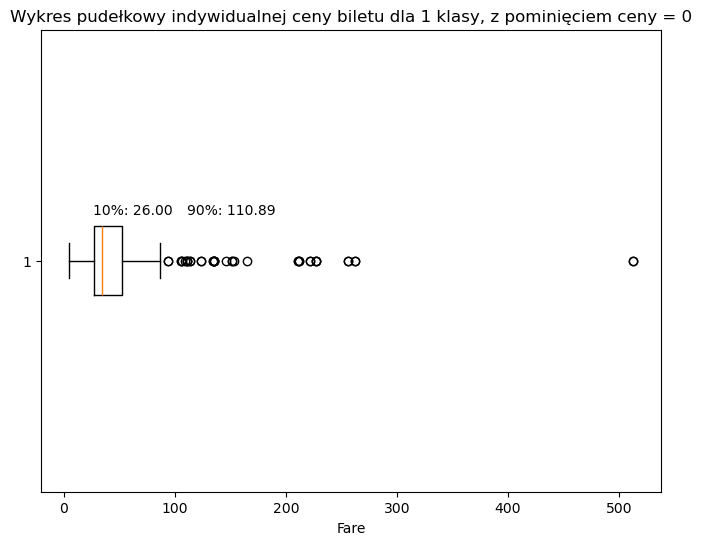

In [375]:
# Filter the DataFrame for class 1 passengers and non-zero fare
class_1_fares = dfpl[(dfpl['klasa'] == 1) & (dfpl['ind cena biletu'] > 0)]['ind cena biletu']

# Calculate the 10th and 90th percentiles
percentile_10 = class_1_fares.quantile(0.10)
percentile_90 = class_1_fares.quantile(0.90)

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(class_1_fares, vert=False)
plt.title('Wykres pudełkowy indywidualnej ceny biletu dla 1 klasy, z pominięciem ceny = 0')
plt.xlabel('Fare')

# Annotate the percentiles on the plot
plt.annotate(f'10%: {percentile_10:.2f}', xy=(percentile_10, 1), xytext=(percentile_10, 1.1))
plt.annotate(f'90%: {percentile_90:.2f}', xy=(percentile_90, 1), xytext=(percentile_90, 1.1))         

Jak widać, mamy szereg przypadków, gdy indywidualna cena biletu ma wartość wykraczającą poza percentyl 90%.

Przyjrzyjmy się temu dokładniej.

In [378]:
dfpl[(dfpl['klasa'] == 1) & (dfpl['ind cena biletu'] >110.89)]

,klasa,ocalony,tytuł,nazwisko,imię,płeć,wiek,liczba rodzeństwa/małżonków,liczba rodziców/dzieci,nr biletu,cena biletu,nr kabiny,port,nr łodzi,nr ciała,miejsce docelowe,nazwisko i imię,cleaned_name_ticket,liczbaczr,ind cena biletu
0,1.0,1.0,Miss.,Allen,Elisabeth Walton,female,29.0,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","Allen, Miss. Elisabeth Walton",Allen24160,1.0,211.3375
10,1.0,0.0,Col.,Astor,John Jacob,male,47.0,1.0,0.0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY","Astor, Col. John Jacob",AstorPC 17757,2.0,113.7625
11,1.0,1.0,Mrs.,Astor,John Jacob (Madeleine Talmadge Force),female,18.0,1.0,0.0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY","Astor, Mrs. John Jacob (Madeleine Talmadge Force)",AstorPC 17757,2.0,113.7625
16,1.0,0.0,Mr.,Baxter,Quigg Edmond,male,24.0,0.0,1.0,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ","Baxter, Mr. Quigg Edmond",BaxterPC 17558,2.0,123.7604
17,1.0,1.0,Mrs.,Baxter,James (Helene DeLaudeniere Chaput),female,50.0,0.0,1.0,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ","Baxter, Mrs. James (Helene DeLaudeniere Chaput)",BaxterPC 17558,2.0,123.7604
23,1.0,1.0,Miss.,Bidois,Rosalie,female,42.0,0.0,0.0,PC 17757,227.5250,NaN,C,4,NaN,NaN,"Bidois, Miss. Rosalie",BidoisPC 17757,1.0,227.5250
24,1.0,1.0,Miss.,Bird,Ellen,female,29.0,0.0,0.0,PC 17483,221.7792,C97,S,8,NaN,NaN,"Bird, Miss. Ellen",BirdPC 17483,1.0,221.7792
28,1.0,1.0,Miss.,Bissette,Amelia,female,35.0,0.0,0.0,PC 17760,135.6333,C99,S,8,NaN,NaN,"Bissette, Miss. Amelia",BissettePC 17760,1.0,135.6333
32,1.0,1.0,Miss.,Bonnell,Caroline,female,30.0,0.0,0.0,36928,164.8667,C7,S,8,NaN,"Youngstown, OH","Bonnell, Miss. Caroline",Bonnell36928,1.0,164.8667
35,1.0,1.0,Miss.,Bowen,Grace Scott,female,45.0,0.0,0.0,PC 17608,262.3750,NaN,C,4,NaN,"Cooperstown, NY","Bowen, Miss. Grace Scott",BowenPC 17608,1.0,262.3750


Najwyższa indywidualna cena biletu (ponad 500) występuje przy pasażerze Gustave Lesurer. Znajdując informacje poza tą bazą danych dowiadujemy się jednak, że był on służącym i podróżował razem z małżeństwem, które było jego pracodawcą. Czy cena biletu służącego mogła być tak wysoka? Raczej nie. Należałoby ją odrzucić lub odpowiednio skorygować po sprawdzeniu, czy rónież małżeństwo jego pracodawców jest w tej bazie.

Pododbnie należałoby postąpić dla pozostałych wartości odstających, analizując także ewentualne niewyświetlone tu rekordy, gdzie cena biletu jest mniejsza od 26. Taką samą analizę można przeprowadzić jeszcze dla klasy 2 oraz dla klasy 3.

Wymaga to jednak znacznego nakładu pracy i byłoby celowe, gdyby z jakichś powodów analiza indywidualnej ceny biletów okazała się zagadnieniem kluczowym. Tak jednak w naszym przypadku nie jest i rezygnujemy z dalszego badania tego tematu.

## Wnioski końcowe

Przeprowadziliśmy podstawową analizę bazy danych pasażerów Titanica. Baza obejmuje tylko dane 1309 pasażerów, nie obejmuje danych załogi, liczącej około 900 osób.

W bazie mamy pełne dane odnośnie nazwisk pasażerów, płci, liczby członków rodziny na pokładzie(choć zdarzają się tu pomyłki), numeru biletu, dla dwóch pasażerów brak informacji o porcie pierwotnym, brakuje ok. 20% danych odnośnie wieku, oraz jeszcze większej ilości danych o numerze kabiny, porcie docelowym. Brakuje (ze zrozumiałych względów) dużej ilości danych o numerze łodzi ratunkowej i numerze ciała.

Przeprowadziliśmy analizę danych pod kątem wieku ofiar, korelacji wieku z faktem przeżycia (ta korelacja okazała się niewielka, choć są ciekawe wyjątki, omówione wyżej). Najbardziej charakterystyczne spostrzeżenia to te, które wskazują, że pasażerowie najdroższej klasy 1 mieli 3-4 krotnie większe szanse na uratowanie się od tych, którzy podróżowali w klasie najtańszej, czyli 3. Charakterystyczne też, że dużo większe szanse przeżycia miały kobiety niż mężczyźni.

Okazało się też, że ok. 26% rodzin podróżujących na pokładzie zginęło w całości, a uratowało się ok. 30% rodzin.

Znaleźliśmy sporo danych odstających w zakresie indywidualnej ceny biletu i wskazaliśmy w jaki sposób te dane można ewentualnie usuwać bądź korygować, gdyby indywidualna cena biletu okazała się wielkością kluczową do innych analiz.

Zaprezentowaną analizę można jeszcze poszerzyć odnośnie analizy obejmującej łodzie ratunkowe - na przykład ilu pasażerów było na każdej z nich, ilu się uratowało, czy były łodzie, na których wszyscy przeżyli, bądź takie, które zatonęły.
Można także pokusić się o dokładniejsze przeanalizowanie poprawności danych odnośnie liczby osób spokrewnionych na pokładzie. Można też doprecyzować lepiej kryterium rodziny, wykraczając poza zgodność wyłącznie nazwiska i numeru biletu.

W przypadku tej analizy wydaje się, że niepotrzebnie wprowadziliśmy do badanej tabeli danych polskie nazwy kolumn. Wydawało się na początku, że zwiększy to przejrzystość całej analizy, ale tak się jednak nie stało, niekiedy stanowiło to wręcz utrudnienie. Uzasadnione wydaje się jednak skopiowanie pierwotnej bazy danych do tablicy roboczej i prowadzenie dalszych analiz już na tablicy roboczej.

In [1]:
!jupyter nbconvert titanic.ipynb --to html --no-input --no-prompt


[NbConvertApp] Converting notebook titanic.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 649333 bytes to titanic.html
